In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import seaborn as sns
sns.set(
    style='white'
)

## General equation
$$
\frac{dS}{dt} = \nu - \sum_{i=1}^{n}{N_i J_i^S(S)} \\
\frac{dN_i}{dt} = cJ_i^{ATP}(S)N_i - d N_i
$$


- $\nu$ resource production rate
- $J_i^S(S)$ resource consumption rate of strain $i$
- $J_i^{ATP}(S)$ ATP production rate of strain $i$
- $c$ porportion between ATP production and growth rate
- $d$ death rate

## Single strain

$$
\frac{dS}{dt} = \nu - N_1 J^S(S) \\
\frac{dN_1}{dt} = cJ_1^{ATP}(S)N_1 - d N_1
$$

When $\nu,d>0$, the equilibrium ($dS/dt=dN_1/dt=0$) solved by: 
$$
J_1^{ATP}(S^*)=\frac{d}{c} \\
N_1^* = \frac{J_1^{ATP}(S^*)}{J^S(S^*)} \frac{\nu c }{d}
$$
for any choice of $J_1^S, J_1^{ATP}$.

For $\nu=0, d>0$, $S,N_1\to 0$.

For $\nu>0, d=0$, $N_1\to \infty$.

For $\nu=d=0$, if we assume that 

then the model resolved to a logistic model:
$$
\frac{dN}{dt} =  \frac{m}{K} N \Big(1-\frac{N}{K}\Big)
$$
where $K=\frac{c}{m}S^m(0)+N(0)$. 

If 
$$
J^S(S)=S^m \\
J_1^{ATP}(S) = S
$$

then we get:
$$
\frac{dN}{dt} = \frac{1}{m K} N \Big(1-\frac{N}{K}\Big)
$$
with $K=mcS(0)+N(0)$.

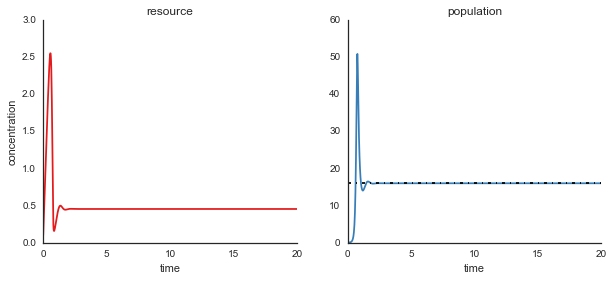

In [46]:
def JS(S):
     return S/(1 + S)  # respiration
def JATP(S):
    return 32 * JS(S) # respiration

def dydt(y, t, nu, c, d):
    S, N = y
    dS = nu - N * JS(S)
    dN = c * JATP(S) * N - d * N
    return [dS, dN]

t = np.linspace(0, 20, 1000)
nu, c, d = 5, 1, 10
S0, N0 = 0.1, 0.1

y = odeint(dydt, y0=(S0, N0), t=t, args=(nu, c, d))
if d > 0:
    K = nu * c/d * JATP(y[-1,0]) / JS(y[-1,0])
# elif nu == 0:
#     K = c/m * S0**m + N0
elif nu > 0:
    K = np.inf
    
red, blue = sns.color_palette('Set1', 2)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(10,4))
ax[0].plot(t, y[:,0], color=red, label='S')
ax[1].plot(t, y[:,1], color=blue, label='N1')
ax[1].axhline(y=K, color='k', ls='-.')
ax[0].set(
    xlabel='time',
    ylabel='concentration',
    title='resource'
)
ax[1].set(
    xlabel='time',
    title='population'
)
# plt.legend()
sns.despine()


# Two types: respirator and fermentor

$$
\frac{dS}{dt} = \nu - \frac{S}{1 + S} N_1 - \frac{100S}{100 + S} N_2  \\
\frac{dN_1}{dt} = N_1 \Big(32c \frac{S}{1+S}  - d\Big) \\
\frac{dN_1}{dt} = N_2 \Big(32c \frac{S}{1+S} + 2c \Big(\frac{100S}{100 + S} - \frac{S}{1 + S}\Big) - d \Big)
$$

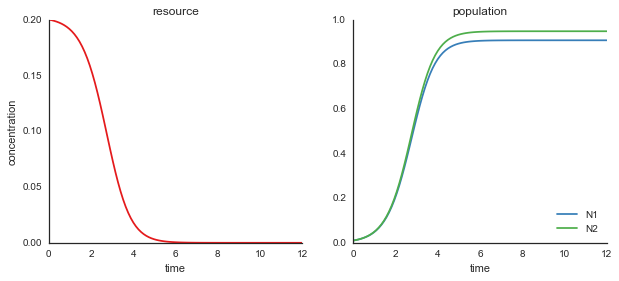

In [107]:
def J1S(S): # respiration
    return S/(1 + S)  
def J2S(S): # fermentation
    return 100*S/(100 + S)  
def J1ATP(S): # respiration
    return 32 * J1S(S) 
def J2ATP(S): # fermentation
    return 32 * J1S(S) + 2*(J2S(S) - J1S(S)) 

def dydt(y, t, nu, c, d):
    S, N1, N2 = y
    dS = nu - N1 * J1S(S) - N2 * J2S(S)
    dN1 = c * J1ATP(S) * N1 - d * N1
    dN2 = c * J2ATP(S) * N2 - d * N2
    return [dS, dN1, dN2]

t = np.linspace(0, 12, 100)
nu, c, d = 0, 0.3, 0
S0, N10, N20 = 0.2, 0.01, 0.01

y = odeint(dydt, y0=(S0, N10, N20), t=t, args=(nu, c, d))
    
red, blue, green = sns.color_palette('Set1', 3)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(10,4))
ax[0].plot(t, y[:,0], color=red, label='S')
ax[1].plot(t, y[:,1], color=blue, label='N1')
ax[1].plot(t, y[:,2], color=green, label='N2')
ax[0].set(
    xlabel='time',
    ylabel='concentration',
    title='resource'
)
ax[1].set(
    xlabel='time',
    title='population'
)
ax[1].legend(loc='lower right')
sns.despine()

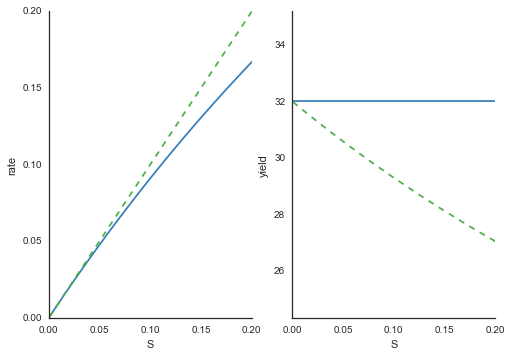

In [106]:
fig,ax = plt.subplots(1, 2, sharex=True)
S = y[:,0]
ax[0].plot(S, J1S(S), color=blue)
ax[0].plot(S, J2S(S), ls='--', color=green)
ax[1].plot(S, J1ATP(S)/J1S(S), color=blue)
ax[1].plot(S, J2ATP(S)/J2S(S), ls='--', color=green)
ax[0].set(
    xlabel='S',
    ylabel='rate',    
)
ax[1].set(
    xlabel='S',
    ylabel='yield',
    ylim=((J2ATP(S)/J2S(S)).min()*0.9, (J2ATP(S)/J2S(S)).max()*1.1)
)
sns.despine()